## Ch 7.11.2.1

In [1]:
import os
import copy
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import time
start = time.time()
plt.rcParams["figure.figsize"] = [6.0, 4.0]

from sklearn.model_selection import train_test_split

from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from util import util
from util.VisualizeDataset import VisualizeDataset

In [2]:
DATA_PATH = Path('./data/')
DATASET_FNAME = 'result-given/chapter5_result.csv'
RESULT_FNAME = 'intermediate/chapter7_result.csv'
EXPORT_TREE_PATH = Path('./figures/crowdsignals_ch7_classification/')

In [3]:
N_FORWARD_SELECTION = 50
dataset = pd.read_csv(DATA_PATH / DATASET_FNAME, index_col=0)
dataset.index = pd.to_datetime(dataset.index)

In [5]:
dataset

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,mag_watch_z_freq_1.2_Hz_ws_40,mag_watch_z_freq_1.3_Hz_ws_40,mag_watch_z_freq_1.4_Hz_ws_40,mag_watch_z_freq_1.5_Hz_ws_40,mag_watch_z_freq_1.6_Hz_ws_40,mag_watch_z_freq_1.7_Hz_ws_40,mag_watch_z_freq_1.8_Hz_ws_40,mag_watch_z_freq_1.9_Hz_ws_40,mag_watch_z_freq_2.0_Hz_ws_40,cluster
2016-02-08 18:28:25.656222,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,0.001668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2016-02-08 18:28:28.406222,-0.088630,0.170400,9.628089,9.551315,0.197073,1.505779,-0.008870,0.018457,-0.000912,0.001715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2016-02-08 18:28:31.156222,-0.084584,0.171914,9.620668,9.552778,0.194151,1.509347,-0.008438,0.018855,0.000159,0.002014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2016-02-08 18:28:33.906222,-0.081381,0.170345,9.634230,9.546574,0.200030,1.507089,-0.008650,0.018903,-0.003626,0.002016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2016-02-08 18:28:36.656222,-0.097313,0.136100,9.623921,9.545983,0.197746,1.516108,-0.011363,0.015230,-0.023521,0.002096,...,-1.187140e+00,1.130804e+00,-4.046004e-01,1.012557e+00,1.166098e+00,5.130568e-01,3.791358e-01,3.274394e-01,3.076108e-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:40:53.156222,-0.163787,0.183251,9.611648,-5.261667,-5.561800,7.313867,-0.008054,0.020805,0.001829,0.358750,...,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12,2
2016-02-08 20:40:55.906222,-0.163480,0.184232,9.614230,-5.261667,-5.561800,7.313867,-0.008538,0.021053,0.001998,0.358750,...,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12,2
2016-02-08 20:40:58.656222,-0.164780,0.184331,9.615484,-5.261667,-5.561800,7.313867,-0.008474,0.021411,0.002339,0.358750,...,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12,2
2016-02-08 20:41:01.406222,-0.162506,0.185287,9.608581,-5.261667,-5.561800,7.313867,-0.008452,0.021322,0.002050,0.358750,...,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12,2


In [7]:
for column in dataset.columns:
    print(column)

acc_phone_x
acc_phone_y
acc_phone_z
acc_watch_x
acc_watch_y
acc_watch_z
gyr_phone_x
gyr_phone_y
gyr_phone_z
gyr_watch_x
gyr_watch_y
gyr_watch_z
hr_watch_rate
labelOnTable
labelSitting
labelWashingHands
labelWalking
labelStanding
labelDriving
labelEating
labelRunning
light_phone_lux
mag_phone_x
mag_phone_y
mag_phone_z
mag_watch_x
mag_watch_y
mag_watch_z
press_phone_pressure
pca_1
pca_2
pca_3
pca_4
pca_5
pca_6
pca_7
acc_phone_x_temp_mean_ws_120
acc_phone_y_temp_mean_ws_120
acc_phone_z_temp_mean_ws_120
acc_watch_x_temp_mean_ws_120
acc_watch_y_temp_mean_ws_120
acc_watch_z_temp_mean_ws_120
gyr_phone_x_temp_mean_ws_120
gyr_phone_y_temp_mean_ws_120
gyr_phone_z_temp_mean_ws_120
gyr_watch_x_temp_mean_ws_120
gyr_watch_y_temp_mean_ws_120
gyr_watch_z_temp_mean_ws_120
hr_watch_rate_temp_mean_ws_120
light_phone_lux_temp_mean_ws_120
mag_phone_x_temp_mean_ws_120
mag_phone_y_temp_mean_ws_120
mag_phone_z_temp_mean_ws_120
mag_watch_x_temp_mean_ws_120
mag_watch_y_temp_mean_ws_120
mag_watch_z_temp_mean_ws_

In [4]:
DataViz = VisualizeDataset()
prepare = PrepareDatasetForLearning()

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)

print('Training set length is: ', len(train_X.index))
print('Test set length is: ', len(test_X.index))

Training set length is:  2018
Test set length is:  865


In [5]:
## with filter is true ##
# Training set length is:  1285
# Test set length is:  552
# basic features:  21
# PCA features:  7
# time features:  56
# frequency features:  432
# cluster features:  1

In [6]:
basic_features = ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z','gyr_phone_x','gyr_phone_y','gyr_phone_z','gyr_watch_x','gyr_watch_y','gyr_watch_z',
                  'hr_watch_rate', 'light_phone_lux','mag_phone_x','mag_phone_y','mag_phone_z','mag_watch_x','mag_watch_y','mag_watch_z','press_phone_pressure']
pca_features = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7']
time_features = [name for name in dataset.columns if '_temp_' in name]
freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
print('#basic features: ', len(basic_features))
print('#PCA features: ', len(pca_features))
print('#time features: ', len(time_features))
print('#frequency features: ', len(freq_features))
cluster_features = ['cluster']
print('#cluster features: ', len(cluster_features))
features_after_chapter_3 = list(set().union(basic_features, pca_features))
features_after_chapter_4 = list(set().union(basic_features, pca_features, time_features, freq_features))
features_after_chapter_5 = list(set().union(basic_features, pca_features, time_features, freq_features, cluster_features))

#basic features:  21
#PCA features:  7
#time features:  56
#frequency features:  432
#cluster features:  1


In [7]:
fs = FeatureSelectionClassification()
features, ordered_features, ordered_scores = fs.forward_selection(N_FORWARD_SELECTION, 
                                                                  train_X[features_after_chapter_5], 
                                                                  test_X[features_after_chapter_5],
                                                                  train_y,
                                                                  test_y,
                                                                  gridsearch=False)

Added feature0
Added feature1
Added feature2
Added feature3
Added feature4
Added feature5
Added feature6
Added feature7
Added feature8
Added feature9
Added feature10
Added feature11
Added feature12
Added feature13
Added feature14
Added feature15
Added feature16
Added feature17
Added feature18
Added feature19
Added feature20
Added feature21
Added feature22
Added feature23
Added feature24
Added feature25
Added feature26
Added feature27
Added feature28
Added feature29
Added feature30
Added feature31
Added feature32
Added feature33
Added feature34
Added feature35
Added feature36
Added feature37
Added feature38
Added feature39
Added feature40
Added feature41
Added feature42
Added feature43
Added feature44
Added feature45
Added feature46
Added feature47
Added feature48
Added feature49


Figure saved to figures/figure_13.png


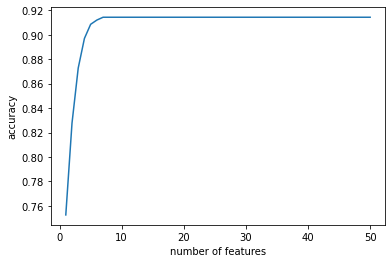

In [45]:
DataViz.plot_xy(x=[range(1, N_FORWARD_SELECTION+1)], y=[ordered_scores],
                xlabel='number of features', ylabel='accuracy')

In [9]:
selected_features = ['acc_phone_y_freq_0.0_Hz_ws_40', 'press_phone_pressure_temp_mean_ws_120', 'gyr_phone_x_temp_std_ws_120',
                     'mag_watch_y_pse', 'mag_phone_z_max_freq', 'gyr_watch_y_freq_weighted', 'gyr_phone_y_freq_1.0_Hz_ws_40',
                     'acc_phone_x_freq_1.9_Hz_ws_40', 'mag_watch_z_freq_0.9_Hz_ws_40', 'acc_watch_y_freq_0.5_Hz_ws_40']


In [10]:
learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()
start = time.time()


reg_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10]
performance_training = []
performance_test = []
## Due to runtime constraints we run the experiment 3 times, yet if you want even more robust data one should increase the repetitions. 
N_REPEATS_NN = 3

In [40]:
for reg_param in reg_parameters:
    performance_tr = 0
    performance_te = 0
    for i in range(0, N_REPEATS_NN):

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(
            train_X, train_y,
            test_X, hidden_layer_sizes=(250, ), alpha=reg_param, max_iter=500,
            gridsearch=False
        )

        performance_tr += eval.accuracy(train_y, class_train_y)
        performance_te += eval.accuracy(test_y, class_test_y)
    performance_training.append(performance_tr/N_REPEATS_NN)
    performance_test.append(performance_te/N_REPEATS_NN)

ValueError: x and y must have same first dimension, but have shapes (6,) and (10,)

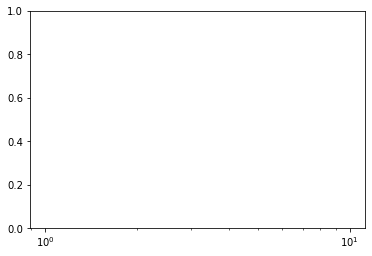

In [57]:
DataViz.plot_xy(x=[reg_parameters, reg_parameters], y=[performance_training, performance_test], method='semilogx',
                xlabel='regularization parameter value', ylabel='accuracy', ylim=[0.95, 1.01],
                names=['training', 'test'], line_styles=['r-', 'b:'])

In [13]:
leaf_settings = [1,2,5,10]
performance_training = []
performance_test = []

In [14]:
for no_points_leaf in leaf_settings:

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(
        train_X[selected_features], train_y, test_X[selected_features], min_samples_leaf=no_points_leaf,
        gridsearch=False, print_model_details=False)

    performance_training.append(eval.accuracy(train_y, class_train_y))
    performance_test.append(eval.accuracy(test_y, class_test_y))

ValueError: x and y must have same first dimension, but have shapes (4,) and (10,)

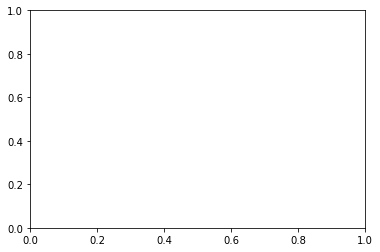

In [58]:
DataViz.plot_xy(x=[leaf_settings, leaf_settings], y=[performance_training, performance_test],
                xlabel='minimum number of points per leaf', ylabel='accuracy',
                names=['training', 'test'], line_styles=['r-', 'b:'])

In [16]:
possible_feature_sets = [basic_features, features_after_chapter_3, features_after_chapter_4, features_after_chapter_5, selected_features]
feature_names = ['initial set', 'Chapter 3', 'Chapter 4', 'Chapter 5', 'Selected features']
N_KCV_REPEATS = 5


print('Preprocessing took', time.time()-start, 'seconds.')

scores_over_all_algs = []

Preprocessing took 183.8944730758667 seconds.


In [17]:
for i in range(0, len(possible_feature_sets)):
    selected_train_X = train_X[possible_feature_sets[i]]
    selected_test_X = test_X[possible_feature_sets[i]]

    # First we run our non deterministic classifiers a number of times to average their score.

    performance_tr_nn = 0
    performance_tr_rf = 0
    performance_tr_svm = 0
    performance_te_nn = 0
    performance_te_rf = 0
    performance_te_svm = 0

    for repeat in range(0, N_KCV_REPEATS):
        print("Training NeuralNetwork run {} / {} ... ".format(repeat, N_KCV_REPEATS, feature_names[i]))
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(
            selected_train_X, train_y, selected_test_X, gridsearch=True
        )
        print("Training RandomForest run {} / {} ... ".format(repeat, N_KCV_REPEATS, feature_names[i]))
        performance_tr_nn += eval.accuracy(train_y, class_train_y)
        performance_te_nn += eval.accuracy(test_y, class_test_y)
        
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(
            selected_train_X, train_y, selected_test_X, gridsearch=True
        )
        
        performance_tr_rf += eval.accuracy(train_y, class_train_y)
        performance_te_rf += eval.accuracy(test_y, class_test_y)

        print("Training SVM run {} / {}, featureset: {}... ".format(repeat, N_KCV_REPEATS, feature_names[i]))
      
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.support_vector_machine_with_kernel(
            selected_train_X, train_y, selected_test_X, gridsearch=True
        )
        performance_tr_svm += eval.accuracy(train_y, class_train_y)
        performance_te_svm += eval.accuracy(test_y, class_test_y)

    
    overall_performance_tr_nn = performance_tr_nn/N_KCV_REPEATS
    overall_performance_te_nn = performance_te_nn/N_KCV_REPEATS
    overall_performance_tr_rf = performance_tr_rf/N_KCV_REPEATS
    overall_performance_te_rf = performance_te_rf/N_KCV_REPEATS
    overall_performance_tr_svm = performance_tr_svm/N_KCV_REPEATS
    overall_performance_te_svm = performance_te_svm/N_KCV_REPEATS

#     #And we run our deterministic classifiers:
    print("Determenistic Classifiers:")

    print("Training Nearest Neighbor run 1 / 1, featureset {}:".format(feature_names[i]))
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.k_nearest_neighbor(
        selected_train_X, train_y, selected_test_X, gridsearch=True
    )
    performance_tr_knn = eval.accuracy(train_y, class_train_y)
    performance_te_knn = eval.accuracy(test_y, class_test_y)
    print("Training Descision Tree run 1 / 1  featureset {}:".format(feature_names[i]))
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(
        selected_train_X, train_y, selected_test_X, gridsearch=True
    )
    
    performance_tr_dt = eval.accuracy(train_y, class_train_y)
    performance_te_dt = eval.accuracy(test_y, class_test_y)
    print("Training Naive Bayes run 1/1 featureset {}:".format(feature_names[i]))
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.naive_bayes(
        selected_train_X, train_y, selected_test_X
    )
   
    performance_tr_nb = eval.accuracy(train_y, class_train_y)
    performance_te_nb = eval.accuracy(test_y, class_test_y)

    scores_with_sd = util.print_table_row_performances(feature_names[i], len(selected_train_X.index), len(selected_test_X.index), [
                                                                                                (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                                (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                                (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                                (performance_tr_knn, performance_te_knn),
                                                                                                (performance_tr_knn, performance_te_knn),
                                                                                                (performance_tr_dt, performance_te_dt),
                                                                                                (performance_tr_nb, performance_te_nb)])
    scores_over_all_algs.append(scores_with_sd)


Training NeuralNetwork run 0 / 5 ... 
Training RandomForest run 0 / 5 ... 
Training SVM run 0 / 5, featureset: initial set... 
Training NeuralNetwork run 1 / 5 ... 
Training RandomForest run 1 / 5 ... 
Training SVM run 1 / 5, featureset: initial set... 
Training NeuralNetwork run 2 / 5 ... 
Training RandomForest run 2 / 5 ... 
Training SVM run 2 / 5, featureset: initial set... 
Training NeuralNetwork run 3 / 5 ... 
Training RandomForest run 3 / 5 ... 
Training SVM run 3 / 5, featureset: initial set... 
Training NeuralNetwork run 4 / 5 ... 
Training RandomForest run 4 / 5 ... 
Training SVM run 4 / 5, featureset: initial set... 
Determenistic Classifiers:
Training Nearest Neighbor run 1 / 1, featureset initial set:
Training Descision Tree run 1 / 1  featureset initial set:
Training Naive Bayes run 1/1 featureset initial set:
initial set & 0.9777\emph{( 0.9711 - 0.9843 )}  & 0.9353\emph{( 0.9185 - 0.9520 )} & 0.9948\emph{( 0.9917 - 0.9980 )}  & 0.9496\emph{( 0.9347 - 0.9645 )} & 0.9861\em

Figure saved to figures/figure_14.png


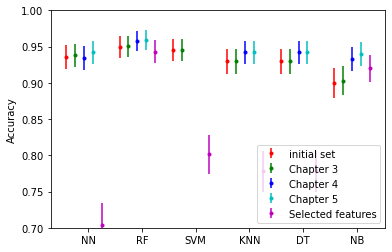

In [48]:
DataViz.plot_performances_classification(['NN', 'RF','SVM', 'KNN', 'DT', 'NB'], feature_names, scores_over_all_algs)

In [21]:
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features],
                                                                                           gridsearch=True,
                                                                                           print_model_details=True, export_tree_path=EXPORT_TREE_PATH)

class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(
    train_X[selected_features], train_y, test_X[selected_features],
    gridsearch=True, print_model_details=True)

test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)

{'criterion': 'gini', 'min_samples_leaf': 2}
Feature importance decision tree:
acc_phone_y_freq_0.0_Hz_ws_40 & 0.36002744424221367
press_phone_pressure_temp_mean_ws_120 & 0.3248560569919354
gyr_phone_x_temp_std_ws_120 & 0.2097950276435963
mag_watch_y_pse & 0.04441432792283984
acc_phone_x_freq_1.9_Hz_ws_40 & 0.01755780895542948
mag_phone_z_max_freq & 0.017155227411722873
acc_watch_y_freq_0.5_Hz_ws_40 & 0.009452510182592558
gyr_phone_y_freq_1.0_Hz_ws_40 & 0.006538249865863363
mag_watch_z_freq_0.9_Hz_ws_40 & 0.005584496342310664
gyr_watch_y_freq_weighted & 0.004618850441495676
{'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 100}
Feature importance random forest:
press_phone_pressure_temp_mean_ws_120 & 0.25710055605748233
acc_phone_y_freq_0.0_Hz_ws_40 & 0.25316187414003893
gyr_phone_x_temp_std_ws_120 & 0.25032033674137977
mag_watch_y_pse & 0.08312153948128387
mag_phone_z_max_freq & 0.0365650270843914
acc_phone_x_freq_1.9_Hz_ws_40 & 0.03343332583422542
gyr_phone_y_freq_1.0_H

Figure saved to figures/figure_15.png


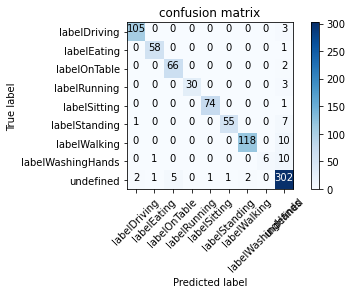

In [49]:
DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)

## Conclusion
As we experiment with the dataset in case we would not throw two labels or unknown label cases out, we compare these two experiments and find out that(in figure 1) the highest accuracy of feature selection is 0.92, which is lower than the original experience. In figure 2, considering adding a regularizer on objective functions, we can see the difference is big. Both the training and test sets are below expectations, and the accuracy of the training set decreases dramatically when the value is 10, it reflects that the unrelated cases severely impact the performance. In figure 3, we notice that the accuracy of the testing set is below 0.94 that worse than an original experiment. Figure 4 gives us a good indication of the generalizability of our models. However, we can find that the performance of the neural network, KNN, and decision tree are worsened than the original experiment. Finally, figure 5 gives us a comparison of confusion matrixes, we can notice the undefined labels have a great impact on prediction, such as undefined is classified as eating five times, washing hands is predicted as undefined ten times. Therefore, we conclude that the unrelated label cases have a great influence on performance. 